In [1]:
import geopandas as gpd
from degurba import DEGURBA
import matplotlib.pyplot as plt

In [2]:
border_path = './test_data/BJStreet.shp'
pn_path = './test_data/bj_ppp_2020_1000m_UNadj.tif'

# 网格像元分类

In [3]:
degurba = DEGURBA(pn_path)
grid_cells_l1 = degurba.classify_grid_cells_l1()

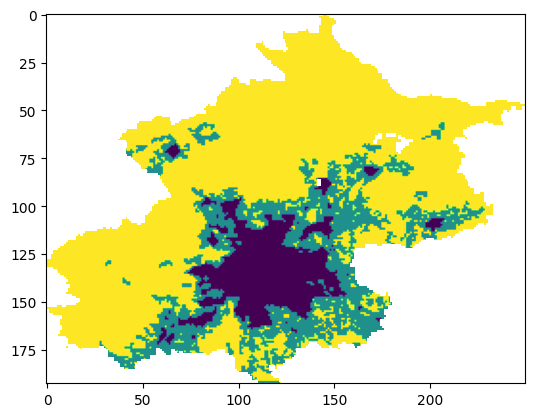

In [4]:
plt.imshow(grid_cells_l1.array);

In [5]:
grid_cells_l1.save('./test_data/grid_cla.tif', nodata=0)

# 本地单元分类

In [6]:
local_units = degurba.classify_local_units_l1(border_path, grid_cells_l1=grid_cells_l1, field='l1', all_touched=False)

In [7]:
local_units.close()

In [8]:
gdf = gpd.read_file(border_path)
gdf.head()

,县,乡,人口数,l1,geometry
0,朝阳区,建外街道,36414.0,1.0,"POLYGON ((116.46 39.903, 116.44 39.902, 116.44..."
1,西城区,展览路街道,114831.0,1.0,"POLYGON ((116.34 39.917, 116.34 39.917, 116.33..."
2,朝阳区,六里屯街道,75229.0,1.0,"POLYGON ((116.5 39.919, 116.49 39.919, 116.49 ..."
3,延庆区,八达岭镇,10024.0,3.0,"POLYGON ((116.05 40.332, 116.05 40.332, 116.05..."
4,延庆区,刘斌堡乡,4497.0,3.0,"POLYGON ((116.21 40.546, 116.21 40.546, 116.21..."


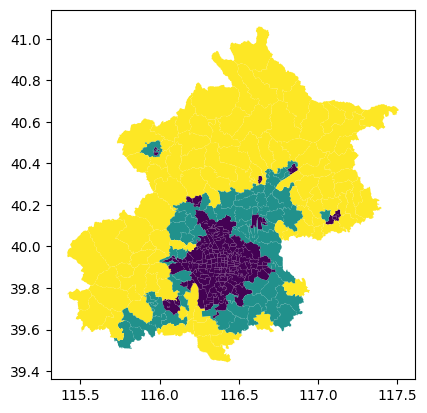

In [9]:
gdf.plot(column='l1');